In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Credit scoring is the likelihood of debt repayment used by debtors to assess risk.

In [2]:
#import home equity loan dataset
hmeq_df=pd.read_csv("C:/Users/oktri/OneDrive/Desktop/Mortgage data/hmeq.csv")
hmeq_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
#What are the missing values in each category ?
hmeq_df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [4]:
# Drop omitted values 
new_hmeq= hmeq_df.dropna()
new_hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [5]:
#1= applicant defaulted on loan, 0= paid loan
print(new_hmeq.groupby("BAD").size())


BAD
0    3064
1     300
dtype: int64


In [6]:
new_hmeq["REASON"].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [7]:
new_hmeq["JOB"].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Sales', 'Self'], dtype=object)

In [8]:
#regression for logit regression *only intercept*

#y = dependent variable
y= new_hmeq["BAD"]

# X = intercept only
X = sm.add_constant([1] * len(new_hmeq))

hmeq_null = sm.Logit(y,X).fit()
print(hmeq_null.summary())

Optimization terminated successfully.
         Current function value: 0.300635
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3363
Method:                           MLE   Df Model:                            0
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:               5.807e-12
Time:                        23:58:05   Log-Likelihood:                -1011.3
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3237      0.060    -38.411      0.000      -2.442      -2.205


In [9]:
#regression for logit regression

hmeq_full = smf.logit(
    "BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC",
    data=new_hmeq
).fit()

hmeq_full.summary()



Optimization terminated successfully.
         Current function value: 0.230688
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3347
Method:                           MLE   Df Model:                           16
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:                  0.2327
Time:                        23:58:05   Log-Likelihood:                -776.03
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                 5.260e-90
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.9951      0.478    -10.453      0.000      -5.932      -4.059
C(REASON)[T.HomeImp]    -0.1113      0.160     -0.696      0.487      -0.425       0.202
C(JOB)[T.Office]        -0.6273      0.267     -2.345      0.019      -1.152      -0.103
C(JOB)[T.Other]         -0.0688      0.208     -0.331      0.741      -0.476       0.339
C(JOB)[T.ProfExe]       -0.1217      0.241     -0.504      0.614      -0.595       0.351
C(JOB)[T.Sales]          1.2458      0.442      2.820      0.005       0.380       2.112
C(JOB)[T.Self]           0.6646      0.408      1.629      0.103      -0.135       1.464
LOAN                 -1.781e-05   8.12e-06     -2.193      0.028   -3.37e-05   -1.89e-06
MORTDUE              -3.923e-06   3.47e-06     -1.129      0.259   -1.07e-05    2.88e-06
VALUE                 4.347e-06      3e-06      1.451      0.147   -1.52e-06    1.02e-05
YOJ                     -0.0105      0.010     -1.038      0.299      -0.030       0.009
DEROG                    0.7190      0.103      6.984      0.000       0.517       0.921
DELINQ                   0.7499      0.070     10.718      0.000       0.613       0.887
CLAGE                   -0.0054      0.001     -5.067      0.000      -0.008      -0.003
NINQ                     0.1232      0.038      3.235      0.001       0.049       0.198
CLNO                    -0.0178      0.008     -2.199      0.028      -0.034      -0.002
DEBTINC                  0.1019      0.010      9.724      0.000       0.081       0.122
========================================================================================
"""

In [10]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2

def fit_glm_binom(data, y, terms):
    """Fit GLM Binomial(logit) with given terms."""
    if len(terms) == 0:
        formula = f"{y} ~ 1"
    else:
        formula = f"{y} ~ " + " + ".join(terms)
    model = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit()
    return model, formula

def crit_k(model, k):
    """Criterion: -2*logLik + k*df_params (matches R step for GLM)."""
    df_params = int(model.df_model) + 1  # +1 for intercept
    return (-2.0 * model.llf) + (k * df_params)

def lr_chisq(restricted, full):
    """Likelihood ratio test (Chi-square) for nested models."""
    lr = 2.0 * (full.llf - restricted.llf)
    df = (int(full.df_model) + 1) - (int(restricted.df_model) + 1)
    p = chi2.sf(lr, df) if df > 0 else np.nan
    return lr, df, p

def stepwise_r_like(data, y, full_terms, k=2, direction="both", verbose=True):
    included = []
    excluded = list(full_terms)

    current, current_formula = fit_glm_binom(data, y, included)
    current_score = crit_k(current, k)

    if verbose:
        print(f"Start: {current_formula}")
        print(f"  criterion={current_score:.3f}")

    while True:
        candidates = []

        # forward candidates
        if direction in ("forward", "both"):
            for term in excluded:
                m_new, f_new = fit_glm_binom(data, y, included + [term])
                score_new = crit_k(m_new, k)
                lr, df, p = lr_chisq(current, m_new)
                candidates.append(("add", term, score_new, m_new, f_new, lr, df, p))

        # backward candidates
        if direction in ("backward", "both") and len(included) > 0:
            for term in included:
                kept = [t for t in included if t != term]
                m_new, f_new = fit_glm_binom(data, y, kept)
                score_new = crit_k(m_new, k)
                lr, df, p = lr_chisq(m_new, current)  # dropping term: compare reduced vs current
                candidates.append(("drop", term, score_new, m_new, f_new, lr, df, p))

        # choose best move (lowest criterion)
        candidates.sort(key=lambda x: x[2])
        best = candidates[0] if candidates else None

        if best is None or best[2] >= current_score - 1e-9:
            break  # no improvement

        action, term, best_score, best_model, best_formula, lr, df, p = best

        # apply move
        if action == "add":
            included.append(term)
            excluded.remove(term)
        else:
            included.remove(term)
            excluded.append(term)

        if verbose:
            print(f"\nStep: {action.upper()} {term}")
            print(f"  LR Chi2={lr:.3f} df={df} p={p:.4g}")
            print(f"  New: {best_formula}")
            print(f"  criterion: {current_score:.3f} -> {best_score:.3f}")

        current, current_formula, current_score = best_model, best_formula, best_score

    if verbose:
        print("\nFinal model:")
        print(f"  {current_formula}")
        print(f"  criterion={current_score:.3f}")

    return current, included, current_formula, current_score


In [11]:
full_terms = [
    "LOAN",
    "MORTDUE",
    "VALUE",
    "C(REASON)",
    "C(JOB)",
    "YOJ",
    "DEROG",
    "DELINQ",
    "CLAGE",
    "NINQ",
    "CLNO",
    "DEBTINC"
]


# The purpose of the stepwise function is to select variables. Using both backward and forward elimination, this method automatically builds a parsimonious(simple) model by selecting significant predictors. The stepwise variable selection improves model interpretation by preventing overfitting by removing redundant variables, and handles high-dimensional data.


In [12]:
# k=5 (more conservative)
m5, terms5, f5, s5 = stepwise_r_like(new_hmeq, y="BAD", full_terms=full_terms, k=5, direction="both")
print(m5.summary())

# k=4
m4, terms4, f4, s4 = stepwise_r_like(new_hmeq, y="BAD", full_terms=full_terms, k=4, direction="both")
print(m4.summary())
# k=3
m3, terms3, f3, s3 = stepwise_r_like(new_hmeq, y="BAD", full_terms=full_terms, k=3, direction="both")
print(m3.summary())
# k=2 (AIC)
m2, terms2, f2, s2 = stepwise_r_like(new_hmeq, y="BAD", full_terms=full_terms, k=2, direction="both")
print(m2.summary())


Start: BAD ~ 1
  criterion=2027.675

Step: ADD DELINQ
  LR Chi2=154.763 df=1 p=1.578e-35
  New: BAD ~ DELINQ
  criterion: 2027.675 -> 1877.913

Step: ADD DEBTINC
  LR Chi2=141.862 df=1 p=1.042e-32
  New: BAD ~ DELINQ + DEBTINC
  criterion: 1877.913 -> 1741.051

Step: ADD DEROG
  LR Chi2=83.129 df=1 p=7.688e-20
  New: BAD ~ DELINQ + DEBTINC + DEROG
  criterion: 1741.051 -> 1662.922

Step: ADD CLAGE
  LR Chi2=45.375 df=1 p=1.627e-11
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE
  criterion: 1662.922 -> 1622.546

Step: ADD NINQ
  LR Chi2=8.591 df=1 p=0.003379
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + NINQ
  criterion: 1622.546 -> 1618.956

Step: ADD CLNO
  LR Chi2=6.928 df=1 p=0.008484
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + NINQ + CLNO
  criterion: 1618.956 -> 1617.027

Final model:
  BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + NINQ + CLNO
  criterion=1617.027
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    BAD  

In this model, the redundant variable is "LOAN" because it is already captured in "DEBTINC", aka Debt-income-ratio. In addition, the p-value of the logit regression is 0.048, almost on the borderline of statistical insignificance. 

In [13]:
y= new_hmeq["BAD"]

# X = intercept only
X = sm.add_constant([1] * len(new_hmeq))

hmeq_null = sm.Logit(y,X).fit()
print(hmeq_null.summary())

Optimization terminated successfully.
         Current function value: 0.300635
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3363
Method:                           MLE   Df Model:                            0
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:               5.807e-12
Time:                        23:58:29   Log-Likelihood:                -1011.3
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3237      0.060    -38.411      0.000      -2.442      -2.205


In [27]:
hmeq_final = smf.logit(
    "BAD ~DEBTINC+DELINQ+DEROG+CLAGE+NINQ+CLNO+JOB",
    data=new_hmeq
).fit()

hmeq_final.summary()

Optimization terminated successfully.
         Current function value: 0.231806
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3352
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Feb 2026   Pseudo R-squ.:                  0.2289
Time:                        00:29:06   Log-Likelihood:                -779.79
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                 2.356e-92
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1546      0.460    -11.203      0.000      -6.056      -4.253
JOB[T.Office]     -0.5548      0.263     -2.111      0.035      -1.070      -0.040
JOB[T.Other]      -0.0163      0.206     -0.079      0.937      -0.420       0.387
JOB[T.ProfExe]    -0.0312      0.237     -0.131      0.895      -0.496       0.434
JOB[T.Sales]       1.4409      0.437      3.296      0.001       0.584       2.298
JOB[T.Self]        0.6079      0.389      1.561      0.118      -0.155       1.371
DEBTINC            0.0996      0.010      9.714      0.000       0.080       0.120
DELINQ             0.7585      0.069     11.016      0.000       0.624       0.893
DEROG              0.7214      0.102      7.070      0.000       0.521       0.921
CLAGE             -0.0057      0.001     -5.532      0.000      -0.008      -0.004
NINQ               0.1200      0.037      3.208      0.001       0.047       0.193
CLNO              -0.0204      0.008     -2.680      0.007      -0.035      -0.005
==================================================================================
"""

In [28]:
from sklearn.metrics import roc_auc_score

# True outcomes (0/1)
y_true = new_hmeq["BAD"]

# Predicted probabilities from statsmodels logit/GLM
y_pred = hmeq_final.predict(new_hmeq)

auc_value = roc_auc_score(y_true, y_pred)
print(auc_value)


0.7964110095735422


# The model achieves an in-sample AUC of 0.7964, indicating good discriminatory ability between good and bad loans

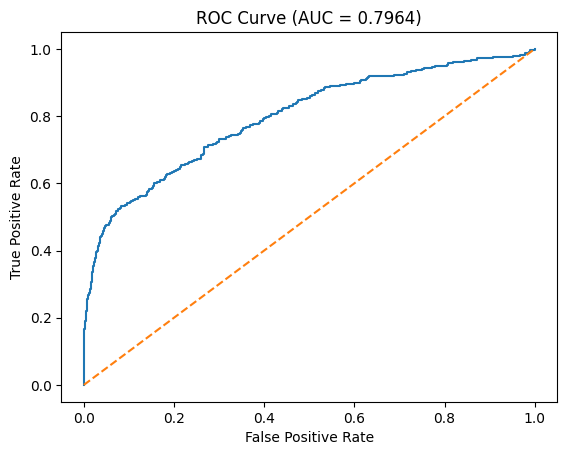

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc_value:.4f})")
plt.show()


In [21]:
params= hmeq_final.params
conf = hmeq_final.conf_int()
conf.columns = ["2.5%", "97.5%"]

odds_ratios = np.exp(params)
conf_exp = np.exp(conf)

results = pd.concat([odds_ratios, conf_exp], axis=1)
results.columns = ["OR", "2.5%", "97.5%"]

results = results.round(4)

results

,OR,2.5%,97.5%
Intercept,0.0058,0.0023,0.0142
JOB[T.Office],0.5742,0.3431,0.9611
JOB[T.Other],0.9838,0.6573,1.4726
JOB[T.ProfExe],0.9693,0.6089,1.5431
JOB[T.Sales],4.2245,1.7935,9.9506
JOB[T.Self],1.8366,0.8562,3.9394
DEBTINC,1.1048,1.0828,1.1272
DELINQ,2.1351,1.8655,2.4435
DEROG,2.0572,1.6843,2.5126
CLAGE,0.9943,0.9923,0.9963


If OR >1, increase the odds of BAD
If OR <1, decrease the odds of BAD
CI above 1, not statistically significant

In [30]:
m, terms, f, s = stepwise_r_like(new_hmeq, y="BAD", full_terms=full_terms, direction="both")
print(m.summary())

Start: BAD ~ 1
  criterion=2024.675

Step: ADD DELINQ
  LR Chi2=154.763 df=1 p=1.578e-35
  New: BAD ~ DELINQ
  criterion: 2024.675 -> 1871.913

Step: ADD DEBTINC
  LR Chi2=141.862 df=1 p=1.042e-32
  New: BAD ~ DELINQ + DEBTINC
  criterion: 1871.913 -> 1732.051

Step: ADD DEROG
  LR Chi2=83.129 df=1 p=7.688e-20
  New: BAD ~ DELINQ + DEBTINC + DEROG
  criterion: 1732.051 -> 1650.922

Step: ADD CLAGE
  LR Chi2=45.375 df=1 p=1.627e-11
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE
  criterion: 1650.922 -> 1607.546

Step: ADD C(JOB)
  LR Chi2=21.752 df=5 p=0.0005836
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + C(JOB)
  criterion: 1607.546 -> 1595.794

Step: ADD NINQ
  LR Chi2=8.821 df=1 p=0.002977
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + C(JOB) + NINQ
  criterion: 1595.794 -> 1588.973

Step: ADD CLNO
  LR Chi2=7.385 df=1 p=0.006575
  New: BAD ~ DELINQ + DEBTINC + DEROG + CLAGE + C(JOB) + NINQ + CLNO
  criterion: 1588.973 -> 1583.587

Step: ADD LOAN
  LR Chi2=3.895 df=1 p=0.04842
  

In [26]:
hmeq_final2 = smf.logit(
    "BAD ~DEBTINC + DELINQ + DEROG + CLAGE + JOB + NINQ + CLNO + LOAN",
    data=new_hmeq
).fit()

hmeq_final2.summary()

Optimization terminated successfully.
         Current function value: 0.231227
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3351
Method:                           MLE   Df Model:                           12
Date:                Tue, 03 Feb 2026   Pseudo R-squ.:                  0.2309
Time:                        00:28:42   Log-Likelihood:                -777.85
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                 2.330e-92
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0272      0.467    -10.764      0.000      -5.943      -4.112
JOB[T.Office]     -0.5704      0.263     -2.166      0.030      -1.086      -0.054
JOB[T.Other]      -0.0476      0.207     -0.230      0.818      -0.453       0.358
JOB[T.ProfExe]    -0.0501      0.238     -0.211      0.833      -0.516       0.415
JOB[T.Sales]       1.3175      0.444      2.968      0.003       0.447       2.188
JOB[T.Self]        0.7541      0.396      1.907      0.057      -0.021       1.529
DEBTINC            0.1020      0.010      9.827      0.000       0.082       0.122
DELINQ             0.7399      0.069     10.739      0.000       0.605       0.875
DEROG              0.7215      0.102      7.056      0.000       0.521       0.922
CLAGE             -0.0055      0.001     -5.271      0.000      -0.008      -0.003
NINQ               0.1245      0.037      3.323      0.001       0.051       0.198
CLNO              -0.0194      0.008     -2.526      0.012      -0.034      -0.004
LOAN           -1.374e-05   7.18e-06     -1.914      0.056   -2.78e-05    3.32e-07
==================================================================================
"""

In [29]:
# True outcomes (0/1)
y_true = new_hmeq["BAD"]

# Predicted probabilities from statsmodels logit/GLM
y_pred = hmeq_final2.predict(new_hmeq)

auc_value = roc_auc_score(y_true, y_pred)
print(auc_value)


0.7997682767624021


In [31]:
params= hmeq_final2.params
conf = hmeq_final2.conf_int()
conf.columns = ["2.5%", "97.5%"]

odds_ratios = np.exp(params)
conf_exp = np.exp(conf)

results = pd.concat([odds_ratios, conf_exp], axis=1)
results.columns = ["OR", "2.5%", "97.5%"]

results = results.round(4)

results

,OR,2.5%,97.5%
Intercept,0.0066,0.0026,0.0164
JOB[T.Office],0.5653,0.3374,0.9472
JOB[T.Other],0.9535,0.6358,1.4300
JOB[T.ProfExe],0.9512,0.5971,1.5151
JOB[T.Sales],3.7341,1.5643,8.9134
JOB[T.Self],2.1256,0.9791,4.6147
DEBTINC,1.1074,1.0851,1.1302
DELINQ,2.0958,1.8311,2.3989
DEROG,2.0576,1.6839,2.5142
CLAGE,0.9945,0.9925,0.9966


In [32]:
params= hmeq_final.params
conf = hmeq_final.conf_int()
conf.columns = ["2.5%", "97.5%"]

odds_ratios = np.exp(params)
conf_exp = np.exp(conf)

results = pd.concat([odds_ratios, conf_exp], axis=1)
results.columns = ["OR", "2.5%", "97.5%"]

results = results.round(4)

results


,OR,2.5%,97.5%
Intercept,0.0058,0.0023,0.0142
JOB[T.Office],0.5742,0.3431,0.9611
JOB[T.Other],0.9838,0.6573,1.4726
JOB[T.ProfExe],0.9693,0.6089,1.5431
JOB[T.Sales],4.2245,1.7935,9.9506
JOB[T.Self],1.8366,0.8562,3.9394
DEBTINC,1.1048,1.0828,1.1272
DELINQ,2.1351,1.8655,2.4435
DEROG,2.0572,1.6843,2.5126
CLAGE,0.9943,0.9923,0.9963
